# INFO 371 Lab 5: K-Means

#### Instructions

Please submit your completed lab notebook by the deadline. Working together is fun and useful but you must submit your own work. Discussing the solutions and problems with your instructors and classmates is completely fine. However, **do not** copy and paste their solution(s). Remember - your code/work should not appear (directly or indirectly) on any one else's machine and vice versa. 


#### Introduction
Your task is in this lab is to use the sklearn [wine dataset](https://scikit-learn.org/1.5/datasets/toy_dataset.html#wine-dataset) to perform some clustering using K-means.

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Part 1: Data preparation

To start, let's import the data. This will have several steps.

#### 1. Load the data.

Load the data using the `load_wine()` function from `sklearn.datasets`. 

In [41]:
from sklearn.datasets import load_wine

In [42]:
data_load = load_wine()

#### 2. Store as a DataFrame
Store the data as a pandas DataFrame. Use the data dictionary (i.e. the `DESCR` from your `load_wine()` call) to find the column names for the data.

In [43]:
data = pd.DataFrame(data = data_load.data, columns=data_load.feature_names)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


#### 3. Visualize

Create a scatter plot visualization of hue vs color intensity. Be sure to label axes. What do you see? If you had to roughly divide the data into clusters, how many clusters would there be?

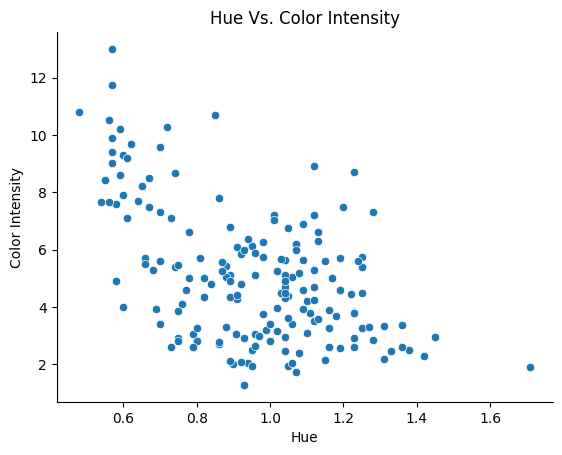

In [44]:
scatterplot = sns.scatterplot(data = data, x = 'hue', y = 'color_intensity')
_ = plt.xlabel('Hue')
_ = plt.ylabel('Color Intensity')
_ = plt.title('Hue Vs. Color Intensity')
sns.despine()


The scatterplot has a weak, negative correlation and is quite spread out. I see 2 different clusters, one in the top left, and the other one is the rest of the points.

### Part 2: Kind optimal K

Next, we'll use K-means and find the optimal number of clusters for our data.

#### 1. Import K-Means and look at documentation

Import K-Means from `sklearn.cluster`. Look at the documentation for the function and find what attribute will give us an estimate of our loss, as measured as the sum of squared distances of samples to their closest center. What is the attribute of interest? We'll refer to this as the "loss" going forward.

In [49]:
from sklearn.cluster import KMeans

The name of the attribute is 'inertia_'

#### 2. Iterate through number of clusters

Next, set up a for loop that iterates from 1-10 as the number of clusters and, upon each iteration, fits K-means to hue and color intensity variables across all rows of the wine data using the specified number of clusters. At each iteration, store the loss (as specified by the attribute you identified above). An outline of this is provided below.

- Initialize list to store the output (losses)
- for i = 1 through 10:
    - initialize K-means - set a random state and set n_clusters = i
    - fit K-means to `data[['hue', 'color_intensity]]`
    - append the loss from the fitted K-means to the losses list
    
\* note that because we're not setting this up as a supervised learning problem or trying to assign clusters to unseen data, we're not using a train/test split

In [50]:
losses = []

for n_clusters in range(1, 11):
    model = KMeans(n_clusters=n_clusters, random_state=11)
    model.fit(X = data[['hue', 'color_intensity']])
    losses.append(model.inertia_)

losses

[960.5248989229224,
 323.18854895735103,
 145.01417240161015,
 92.66406134143601,
 60.62277767049043,
 45.47054525499057,
 36.1824135216748,
 29.69569315961975,
 23.718951889359957,
 21.011151805660056]

#### 3. Plot losses

Plot the loss from each iteration of K-means against the number of clusters (1-10). What does your plot look like? Is there an obvious "elbow" (i.e. point of diminishing returns)? How does the approximate location of the elbow align with what you saw when you visualized the data?

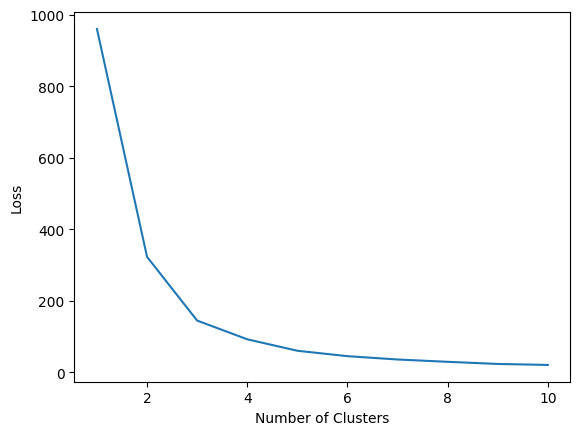

In [65]:
loss_plot = sns.lineplot(x=np.arange(1, 11), y=losses)
_ = plt.xlabel('Number of Clusters')
_ = plt.ylabel('Loss')

The plot diminishes as it goes to the right. The elbow seems to be at k = 3 which is one more than what I predicted would be the number of clusters initially (based on the scatterplot from earlier).

### Part 3: Re-fit and plot

Now, let's refit K-means using the optimal number of clusters

#### 1. Re-fit K-means

Re-fit K-means using the optimal number of clusters that you found above (i.e. the "elbow" point of your plot). Use the `labels_` attribute to extract the label for each point from your fitted model.

In [66]:
model = KMeans(n_clusters=3, random_state=11)
model.fit(X = data[['hue', 'color_intensity']])
model.labels_

array([1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2,
       2, 2], dtype=int32)

#### 2. Plot the results

Replot your scatter plot of hue vs color intensity but now use the labels you pulled from your fitted model as the colors for the points. Do the final groupings align with intuition?

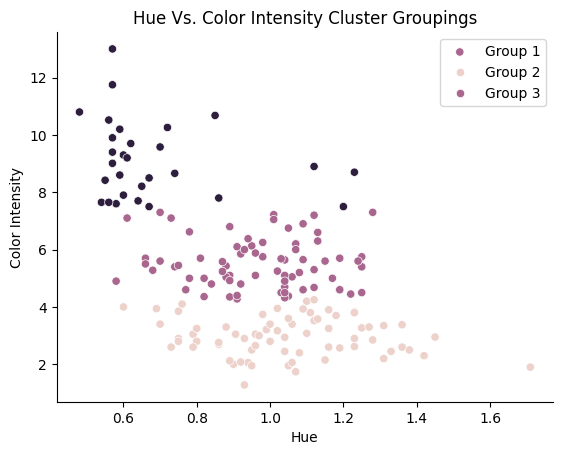

In [74]:
fitted_plot = sns.scatterplot(data=data, x='hue', y='color_intensity', hue=model.labels_)
_ = plt.xlabel('Hue')
_ = plt.ylabel('Color Intensity')
_ = plt.legend(labels=['Group 1', 'Group 2', 'Group 3'])
_ = plt.title('Hue Vs. Color Intensity Cluster Groupings')
sns.despine()

The final groupings make sense as I can clearly see the separation between each cluster. However, I initially predicted 2 clusters while there are instead 3.